# Fordgobike Trip Data 

## Invastigating Overview
These data related to some bike trips, so we want to know who spend more time in trip and does your age affect the ride also who is more subscribers or customers?
These are some of the questions we will answer using visualz and charts.

## Dataset Overview

The data consisted of trips of approximately 183412 trips. They were taking during february-2019. the data has some records like the birth year, gender, start and end time, and duration of the trip  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
# Reading the data and its details
trips = pd.read_csv('201902-fordgobike-tripdata.csv')
trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# Knowing information about the data
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
trips.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### Cleaning
- Deleting Ids columns
- turning start and end time columns to date time for easier analysis
- turning the member birth year column to integer

In [5]:
# Droping the stations ids columns as it wont be needed in visualizations
trips.drop(['start_station_id','end_station_id'], inplace=True, axis=1)
trips.head()

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,The Embarcadero at Steuart St,37.791464,-122.391034,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
# Using datetime library type in some columns
trips['start_time'] = pd.to_datetime(trips['start_time'])
trips['end_time'] = pd.to_datetime(trips['end_time'])

### Datetime library provide a lot of functions that will be useful for visualization

In [7]:
trips.head()

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,37.791464,-122.391034,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### First we need to know the missing data our dataframe 
- I will use barplot to count the missing data

In [8]:
# Let's drop the column that do not have any NaN/None values
na_counts = trips.drop(['duration_sec', 'start_time', 'end_time','start_station_latitude','start_station_longitude','end_station_latitude','start_station_longitude','start_station_longitude','bike_id','user_type','bike_share_for_all_trip'], axis=1).isna().sum()


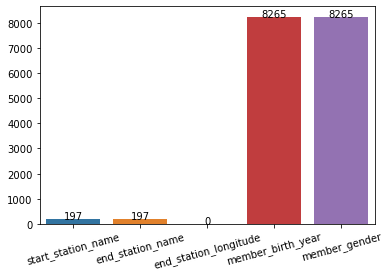

In [9]:
# Drawing a barplot for missing values
sb.barplot(na_counts.index.values, na_counts)
plt.xticks(rotation=15)
for i in range (na_counts.shape[0]):
    count = na_counts[i]
    plt.text(i, count+300, count, ha = 'center', va='top');

### We can see from the chart that there are to columns with large number of NaN values we cannot leave them like that 

#### We can replace the missing values in member birth year column with the mode of the column and replace the missing values in member gender column with unkown 

In [10]:
# Replacing NaN Values in both columns
mod = trips['member_birth_year'].mode()[0]
trips['member_birth_year'].fillna(mod , inplace = True)
trips['member_gender'].fillna("Unkown" , inplace = True)

In [11]:
trips.head()

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,37.791464,-122.391034,Berry St at 4th St,37.775880,-122.393170,2535,Customer,1988.0,Unkown,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [12]:
# Turning the birth years columns to int
trips['member_birth_year'] = trips['member_birth_year'].astype('int64')

In [13]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_name       183215 non-null  object        
 4   start_station_latitude   183412 non-null  float64       
 5   start_station_longitude  183412 non-null  float64       
 6   end_station_name         183215 non-null  object        
 7   end_station_latitude     183412 non-null  float64       
 8   end_station_longitude    183412 non-null  float64       
 9   bike_id                  183412 non-null  int64         
 10  user_type                183412 non-null  object        
 11  member_birth_year        183412 non-null  int64         
 12  member_gender   

In [14]:
# Saving the clean csv to work on it in the explanatory analysis
trips.to_csv('201902-fordgobike-tripdata_clean.csv')

## Now, As we finished cleaning the dataset we can start our visuals
### First: Univariant Plots
### 1.1  who is more in user types?

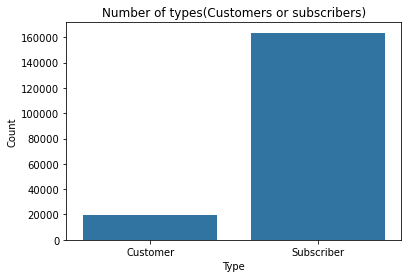

In [15]:
# here bar plot is strong one to see the count between the two types
base_color = sb.color_palette()[0]
sb.countplot(data=trips, x='user_type', color=base_color)
plt.xlabel('Type')
plt.ylabel('Count');
plt.title('Number of types(Customers or subscribers)');

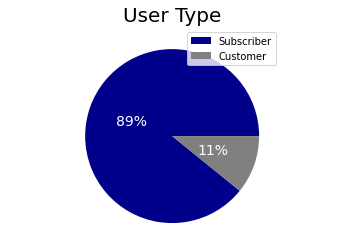

In [16]:
# Since we have only two catagories we also can use pie chart as plot
sorted_counts = trips['user_type'].value_counts()
colors = ( "darkblue",
           "gray")
plt.pie(sorted_counts, labels = sorted_counts.index, textprops={'fontsize': 14,'color':"w"},counterclock =True, autopct="%.0f%%",pctdistance=0.5,colors = colors)
plt.legend(sorted_counts.index, loc="best")
plt.title("User Type", fontsize=20);

### We can see here that the subscriber are by far more than the customers
- We can assume that the company provide more advantages and offers for the subscriber so people trust them 

### 1.2 What is the ditribution of age ine the dataset?


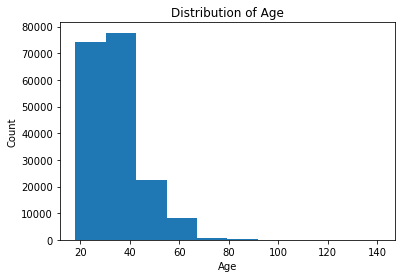

In [17]:
# Here as the age is aquantitative value we can use histogram
trips['age'] = 2019 - trips['member_birth_year']
plt.hist(data = trips, x = 'age')
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.ylabel('Count');

### The distribution is right skewed which makes since as the younger ages will probably need to ride a bike as sport or to work,etc.... 

### 1.3 What is the distribution of start station latitudes?


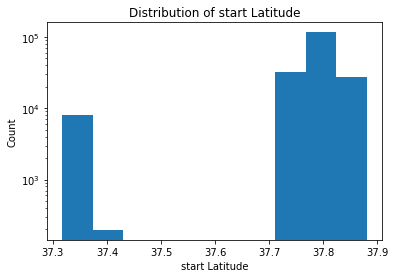

In [18]:
# A histogram is the right chice here
plt.hist(data = trips, x = 'start_station_latitude')
plt.xlabel('start Latitude')
plt.title('Distribution of start Latitude')
plt.yscale('log', nonposy='clip');
plt.ylabel('Count');

### We can see from the plot that the most trips start from about 37.8 latitude

### 1.4 What is the sarting hour distribution?

In [19]:
# Extracting hours from start time 
trips['start_hour'] = trips['start_time'].dt.hour

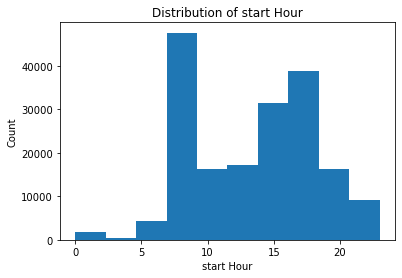

In [20]:
plt.hist(data = trips, x = 'start_hour')
plt.xlabel('start Hour')
plt.title('Distribution of start Hour')
plt.ylabel('Count');

### The distribution is somehow what is called bimodal, it has a beak at about 7 in the morning and another beak at about 4 in the afternoon

### 1.5 What is the distribution of the duration?

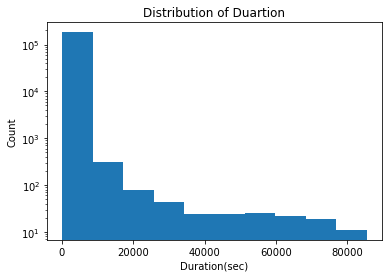

In [21]:
plt.hist(data = trips, x = 'duration_sec')
plt.xlabel('Duration(sec)')
plt.yscale('log', nonposy='clip');
plt.title('Distribution of Duartion')
plt.ylabel('Count');

### The distribution is tailed and the most frequent duration is between 0 and 20000 seconds

### Second : Bivariant plots

### 2.1 What gender spend more time in trips?

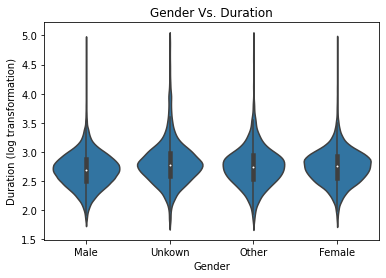

In [22]:
# As the gender and duration are qualitative and quantitative values then a violin plot may be used
# Doing log trans. as duration numbers are large 
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
trips['duration_sec_log'] = trips['duration_sec'].apply(log_trans)
sb.violinplot(data = trips, x = 'member_gender', y = 'duration_sec_log',innner=None,color = base_color)
plt.xlabel('Gender')
plt.title('Gender Vs. Duration')
plt.ylabel('Duration (log transformation)');

### We can see that the four curves seem to normally distributed
- It seems like the ones who refused to declare their gender(Unknown) sometimes tend to spend more time in trips but the average of the trip is some how between 500 and 1000 seconds

### 2.2 Which one spends more in a trip customer or subscriber?


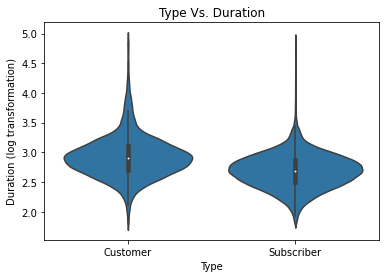

In [23]:
# As the user type and duration are qualitative and quantitative values then a violin plot may be used
sb.violinplot(data = trips, x = 'user_type', y = 'duration_sec_log',innner=None,color = base_color)
plt.xlabel('Type')
plt.title('Type Vs. Duration')
plt.ylabel('Duration (log transformation)');

### We can see that the customer may spend more in a trip. perhaps the customer need the bike one time for a long trip but the subscriber may needed for sport or to go to work near his house so the trip is short

### 2.3 What is the relation between duration and age?

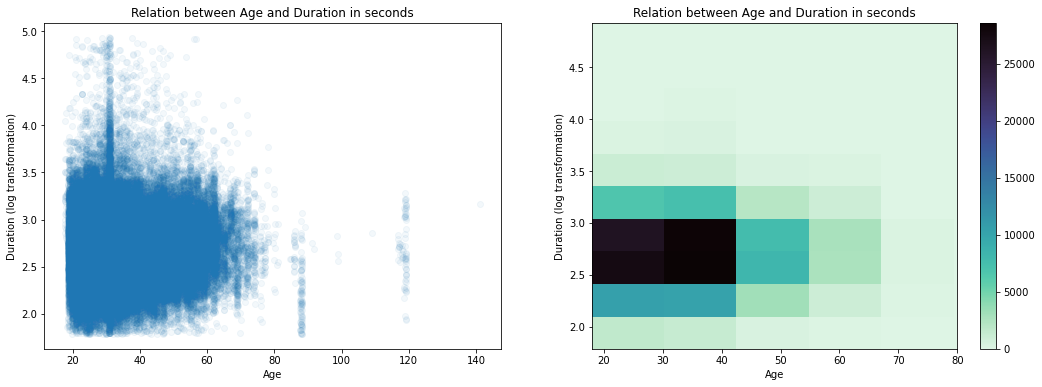

In [24]:
# As they are both quntitative variables then a scatter plot and a heat map may be useful
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)

sb.regplot(data = trips, x='age',y='duration_sec_log', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20},fit_reg=False)
plt.xlabel('Age')
plt.title('Relation between Age and Duration in seconds')
plt.ylabel('Duration (log transformation)');

# PLOT ON Right
plt.subplot(1, 2, 2)
plt.hist2d(data = trips, x = 'age', y = 'duration_sec_log', cmap='mako_r')
plt.colorbar()
plt.xlabel('Age')
plt.xlim(right=80)
plt.title('Relation between Age and Duration in seconds')
plt.ylabel('Duration (log transformation)');

### We can see that the most duarations fall between the ages of 20 and 40

### 2.4 What is the relation between duaration and starting hour?


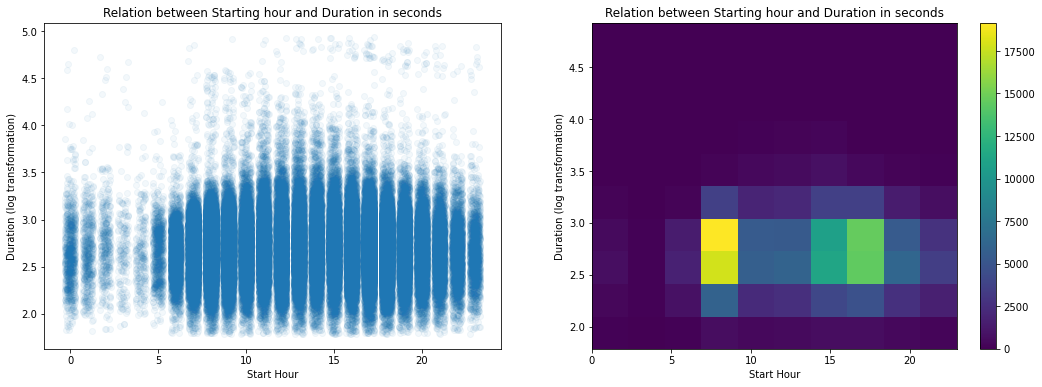

In [25]:
# A Scatter plot and a heat map also may be useful here
plt.figure(figsize = [18, 6])

plt.subplot(1, 2, 1)
sb.regplot(data = trips, x='start_hour',y='duration_sec_log', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20},fit_reg=False)
plt.xlabel('Start Hour')
plt.title('Relation between Starting hour and Duration in seconds')
plt.ylabel('Duration (log transformation)');

plt.subplot(1, 2, 2)
plt.hist2d(data = trips, x = 'start_hour', y = 'duration_sec_log')
plt.colorbar()
plt.xlabel('Start Hour')
plt.title('Relation between Starting hour and Duration in seconds')
plt.ylabel('Duration (log transformation)');

### We can see that the the a large number of points fall in 7 in the morning and 4 in the afternoon(1D hist of start hour) and the duration fall between 500 and 1000 seconds

### Third: Multivariant plots
### 3.1 which type of users rides most through the day? what are their gender? and does the distribution is different for each gender?

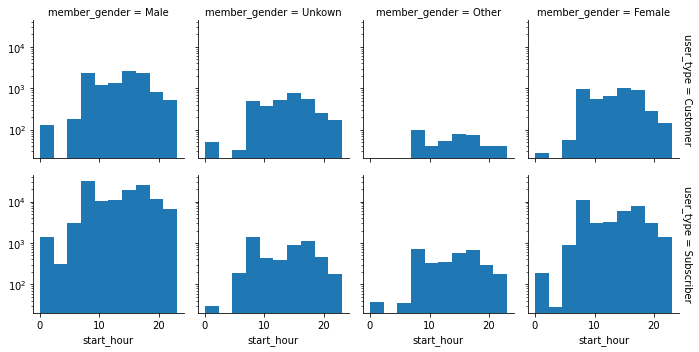

In [26]:
g = sb.FacetGrid(data = trips, col = 'member_gender', row = 'user_type', size = 2.5,
                margin_titles = True)
g.map(plt.hist, 'start_hour');
plt.yscale('log', nonposy='clip');

### We can see that all distribuitions are bimodal.
### We can notice that the subscribers ride more through the day which makes sense as there numbers are larger but the interesting thing that males whether they are customers or subscribers ride more than any other gender.


### 3.2 what is the effect on duration for different ages and genders ? 

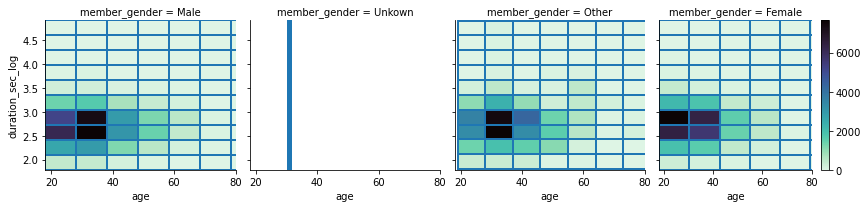

In [27]:
g = sb.FacetGrid(data = trips, col = 'member_gender', size = 3,
                margin_titles = True)
g.map(plt.hist2d, 'age', 'duration_sec_log',cmap='mako_r')
plt.xlim(right = 80);
plt.colorbar();

### Interestingly, We found that most of males and others above 30 have longer trip duration, while females under 30 ride have longer trip duration.

### 3.3 what is the effect on duration for different ages and types ? 

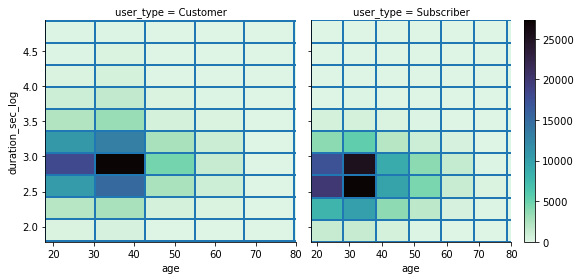

In [28]:
g = sb.FacetGrid(data = trips, col = 'user_type', size = 4,
                margin_titles = True)
g.map(plt.hist2d, 'age', 'duration_sec_log',cmap='mako_r')
plt.xlim(right = 80);
plt.colorbar();

### Most of the ages for both types is between 30 and 40 but the customers in this age tend to spend more time in trips like we said before.

### Conclusion : After cleaning the data and drawing some visuals we reached to these insights,
- The numbers of subscribers is much higher than the number of customers.
- All genders have approxmatily the average number of duration.
- Younger people ride more than older people maybe because they healthier.
- Subscribers have longer trip duration than customers.

#### Must be put in mind that these insghts were based only on the data provided and data analysis techniques applied on the data. 